# 모델링 사용 설명서 3탄 - Ensemble

### 1. Ensemble 개요

### 1) Ensemble 이란?
- 앙상블: 약한 분류기들을 결합하여 강한 분류기로 만드는 것


- 주요 특징
    - 약한 분류기들을 모아 학습/예측 실시
    - 예측을 결합하여 정확한 최종 예측을 산출
    
    
- 머신러닝 알고리즘의 가장 큰 문제 중 하나인 과적합(Overfitting)을 해결하기 위하여 사용 -> 세부적으로 학습하지 않으면 예측 성능이 떨어지는 과소적합 현상 발생

#### [ 문제 해결 ]
1) 약한 분류기로 학습을 진행하여 과적합 문제를 해결

2) 여러 개의 분류기 예측을 결합하여 성능을 향상시켜 과소적합 문제를 해결

## 2. Ensemble의 종류

### 1) Voting
- 각각 다른 알고리즘을 이용한 분류기를 결합하는 방식으로 최종 예측 값을 투표하는 방식

#### [ Hard Voting ]
- 예측한 결과값 중 다수의 분류기가 결정한 값을 최종 예측값으로 선정
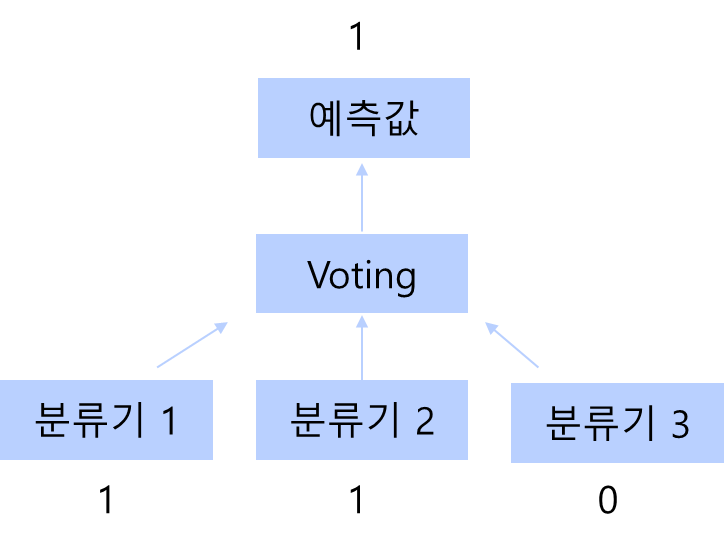

#### [ Soft Voting ]
- 분류기가 예측한 확률 값의 평균으로 결정
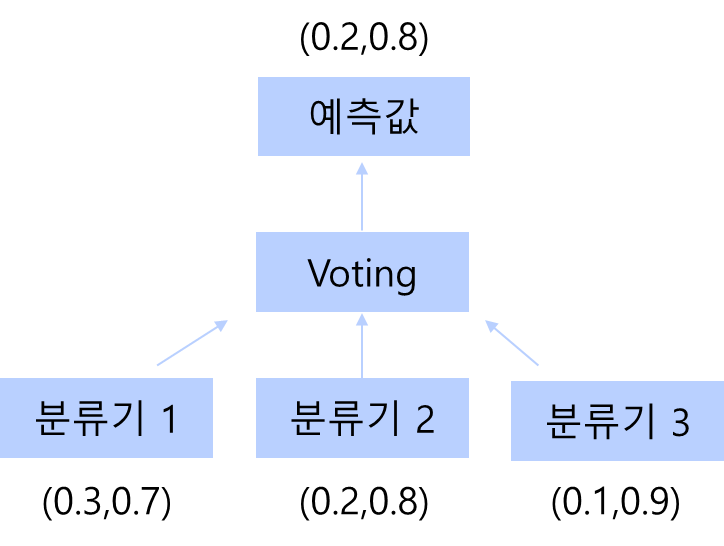

### 2) Bagging
- Bootstrap + Aggregation 으로 나눌 수 있음


- 서로 같은 알고리즘을 이용한 분류기가 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행하는 방식


- 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해 학습을 통해 개별적인 예측을 수행한 결과를 voting을 통해 최종 예측 결과를 선정하는 방식

#### [ Bootstrap ]
- Train Data 에서 여러 번 복원 추출하는 Random Sampling 기법


- 추출된 샘플들을 부트스트랩 샘플이라고 부름

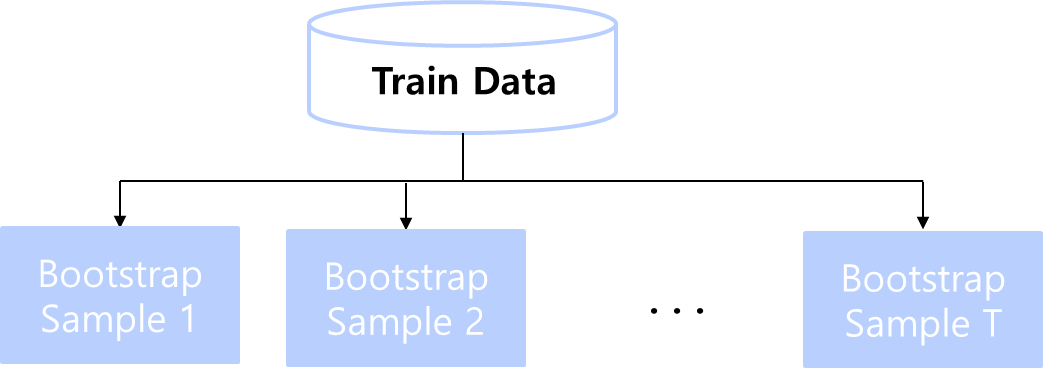


- 이론적으로 36.8%의 샘플이 뽑히지 않게 됨 (Out-Of-Bag 샘플)

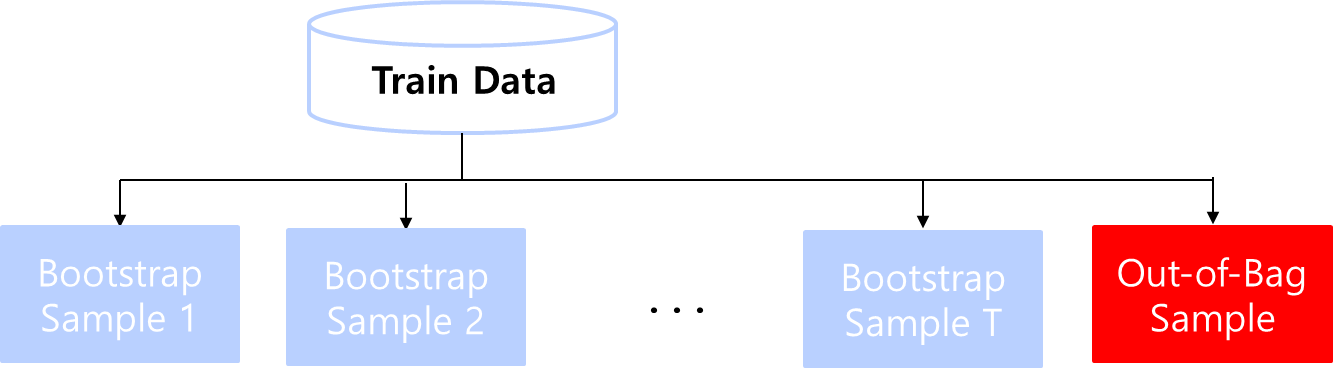

- OOB(Out-Of-Bag) 평가 추출되지 않은 샘플을 이용해 Cross Validation(교차 검증)에서 Valid 데이터로 사용 가능

#### [ 약분류기 생성 ]
- 추출된 부트스트랩 샘플마다 약분류기를 학습 (같은 알고리즘 사용)

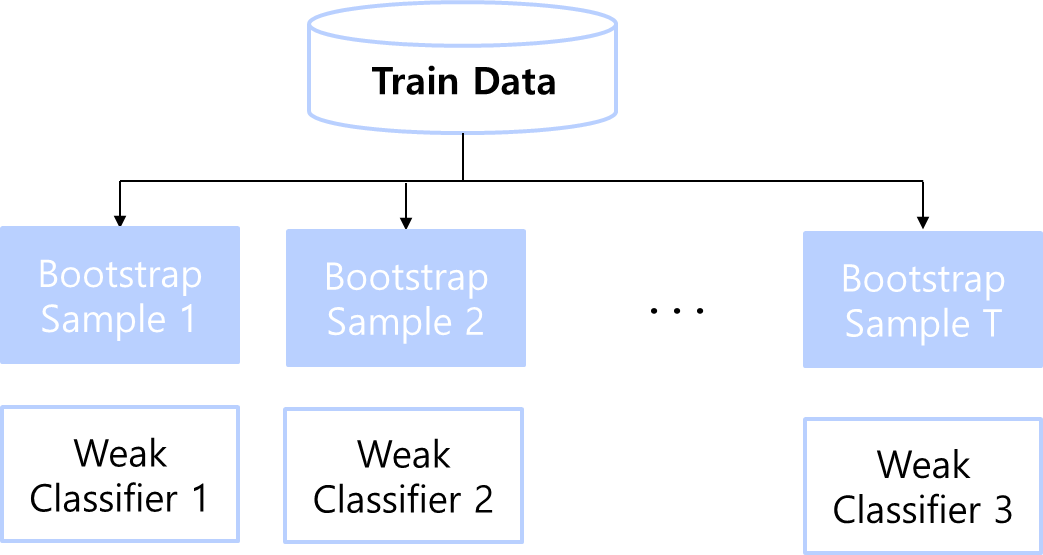

#### [ Aggregation ]
- 생성된 약 분류기들의 예측 결과를 Voting을 통해 결합

### 3) Boosting
- 앞에서 예측한 분류기의 틀린 부분에 대한 가중치를 부여하는 방식


- 가중치를 부여하여 틀린 부분을 더 잘 맞추는데 집중한 방식

#### [ Bagging 과의 차이 ]
- Bagging과 비슷하지만 가중치를 부여한다는 점에서 차이


- Bagging은 일반적인 학습 모델에, Boosting은 어려운 문제를 맞추는 것에 더 적합

## 3. 모듈
- 사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스 제공

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer = load_breast_cancer()

# 데이터 프레임 만들기
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# 데이터를 훈련셋과 테스트셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 보팅 모델에 넣기 위한 개별 모델은 로지스틱회귀와 KNN
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)

voting_model = VotingClassifier(estimators=[('LogisticRegression', logistic_regression),
                                           ('KNN', knn)], voting='soft')

In [6]:
classifiers = [logistic_regression, knn]

# 두 알고리즘 학습 후 테스트
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
    
# 보팅 분류기로 학습 후 테스트
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386
보팅 분류기의 정확도: 0.9474


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.